# Работа в Pandas

**Pandas** (Python Data Analysis Library) — библиотека языка Python для [удобных] обработки и анализа данных. 
Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.

In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 61194 bytes


In [0]:
df=pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Обращение к элементам таблицы

In [0]:
print(df.at[100, 'Age'], '\n')

28.0 



In [0]:
df.loc[[1,2,4,15,30,44], ['Name','Pclass', 'Fare']]

,Name,Pclass,Fare
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,71.2833
2,"Heikkinen, Miss. Laina",3,7.9250
4,"Allen, Mr. William Henry",3,8.0500
15,"Hewlett, Mrs. (Mary D Kingcome)",2,16.0000
30,"Uruchurtu, Don. Manuel E",1,27.7208
44,"Devaney, Miss. Margaret Delia",3,7.8792


In [0]:
df.iloc[10:15,3:10]

,Name,Sex,Age,SibSp,Parch,Ticket,Fare
10,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000
11,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500
12,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500
13,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542


In [0]:
df[['Name', 'Sex', 'Parch']].tail(10) #tail

,Name,Sex,Parch
881,"Markun, Mr. Johann",male,0
882,"Dahlberg, Miss. Gerda Ulrika",female,0
883,"Banfield, Mr. Frederick James",male,0
884,"Sutehall, Mr. Henry Jr",male,0
885,"Rice, Mrs. William (Margaret Norton)",female,5
886,"Montvila, Rev. Juozas",male,0
887,"Graham, Miss. Margaret Edith",female,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,2
889,"Behr, Mr. Karl Howell",male,0
890,"Dooley, Mr. Patrick",male,0


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [0]:
df[df['Sex'] == 'female'].head() # женщины на борту

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
df[(df['Sex'] == 'female') & (df['Age'] >= 60)].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


### Некоторые полезные функции

In [0]:
df['Sex'].nunique() # количество уникальных элементов в столбце

2

In [0]:
df['Sex'].value_counts(1) # встречаемость каждого уникального элемента

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [0]:
df['Fare'].sum() #сумма значений в столбце

28693.9493

In [0]:
df['Age'].mean() #среднее значение элементов столбца

29.69911764705882

In [0]:
df['Age'].std() #среднеквадратичное отклонение 

14.526497332334044

In [0]:
df.sort_values(by='Fare',ascending=False).head() # сортировка по столбцу

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


Что  делает следующая команда?

In [0]:
df[(df['Embarked'] == 'C') & 
     (df['Fare'] > 200)].sort_values(by='Fare',
                               ascending=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.500,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C


### Пропущенные значения в данных (NaN) 

In [0]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Группировка данных с помощью groupby

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [0]:
df1=df.groupby('Sex')# группируем по полу

In [0]:
df1.get_group('male')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,1.0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [0]:
df1.first()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Sex,,,,,,,,,,,,
female,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,2.0
male,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S,1.0


In [0]:
df.groupby('Sex')['Pclass'].value_counts() 

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [0]:
df.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [0]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Функция apply 

Создадим новый признак, описывающий принадлежность к возрастной группе:

In [0]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [0]:
df['Age_category'] = df['Age'].apply(age_category) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0


### Графики, гистограммы и boxplot

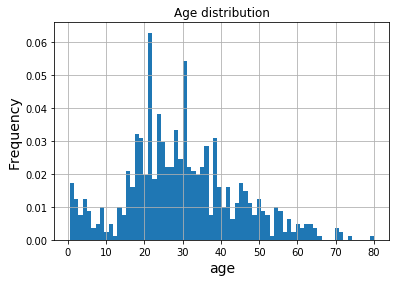

In [0]:
df.hist(['Age'],bins=70,density=True)
plt.xlabel('age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Age distribution')
plt.savefig("age_distribution.png")
files.download("age_distribution.png") 

Text(0, 0.5, 'Fare')

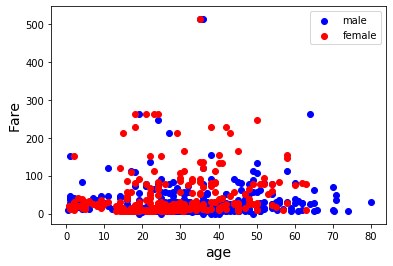

In [0]:
plt.scatter(df[(df['Sex']=='male')]['Age'],df[(df['Sex']=='male')]['Fare']
              ,color='b',label='male')
plt.scatter(df[(df['Sex']=='female')]['Age'],df[(df['Sex']=='female')]['Fare']
              ,color='r',label='female')
plt.legend()
plt.xlabel('age',fontsize=14)
plt.ylabel('Fare',fontsize=14)

In [0]:
age_males=df[(df['Sex'] == 'male')]['Age'].dropna().values
age_females=df[(df['Sex'] == 'female')]['Age'].dropna().values

Text(0, 0.5, 'Age')

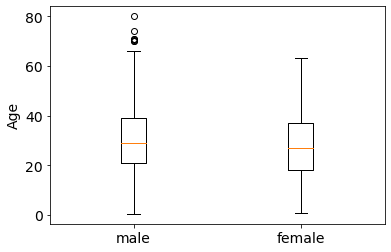

In [0]:
fig=plt.boxplot([age_males,age_females],labels=['male','female'])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('Age', fontsize=14)

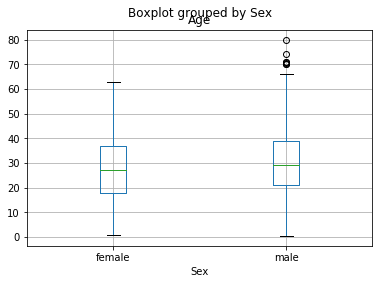

In [0]:
df.boxplot('Age',by='Sex')